## Simple notebook showing the processing steps for deshaking of 2 images
### Stuff needed

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pylapsy as ply

### pylapsy version

In [2]:
ply.__version__

'0.0.1.dev2'

### Synthetic test images

In [3]:
cols, rows = 100, 200
# create image with rectangle in it
img1 = (np.ones((cols, rows))*100).astype(np.uint8)
img1[20:-20, 20:-20] = 255

# create second image with same rectangle as in img1 but shifted and rotated
img2 = (np.ones((cols, rows))*100).astype(np.uint8)
img2[15:-25, 10:-30] = 255

M = cv2.getRotationMatrix2D((cols/2,rows/2),3,1)
img2 = cv2.warpAffine(img2, M, (rows, cols))
img2[img2<100] = 100

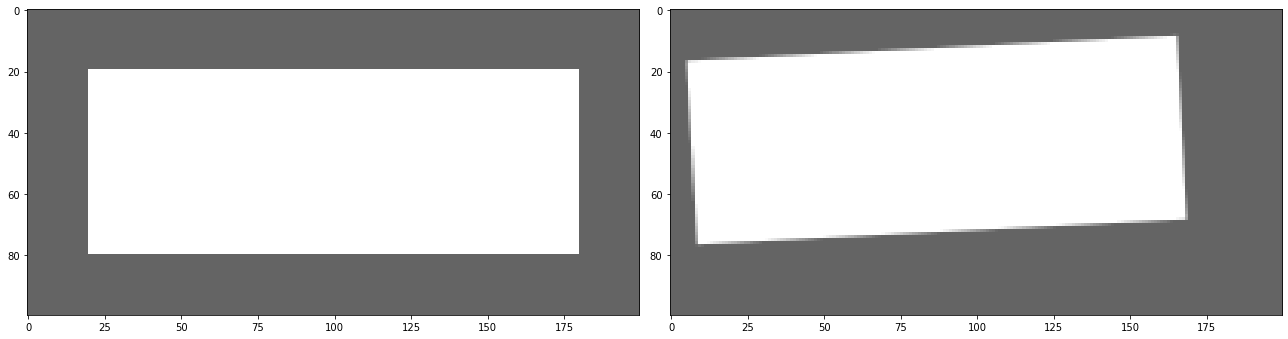

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ply.utils.imshow(img1, vmin=0, vmax=255, ax=ax1)
ply.utils.imshow(img2, vmin=0, vmax=255, ax=ax2)

### Find affine transformation matrix

#### Find good feature points for tracking

In [5]:
p0 = ply.utils.find_good_features_to_track(img1)

Plot points

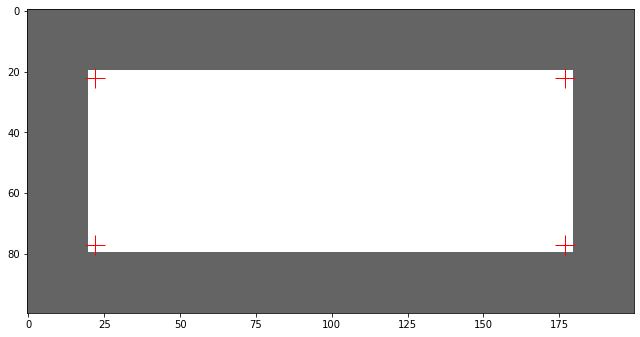

In [6]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax = ply.utils.imshow(img1, vmin=0, vmax=255, ax=ax)
ply.utils.plot_feature_points(p0, ax=ax);

#### Identify these points in the next image

In [7]:
(p0, p1) = ply.utils.compute_flow_lk(img1=img1, img2=img2, points_to_track=p0)

And plot detected points in both images:

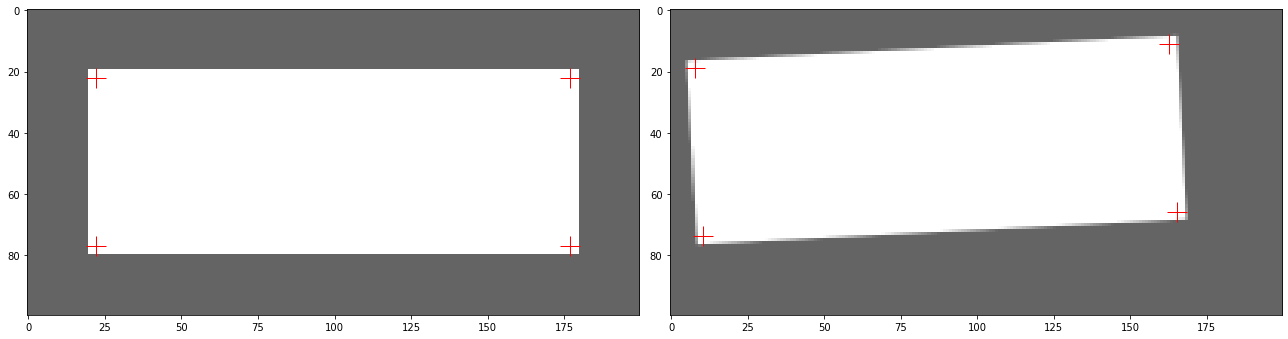

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ply.utils.imshow(img1, vmin=0, vmax=255, ax=ax1)
ply.utils.plot_feature_points(p0, ax=ax1)
ply.utils.imshow(img2, vmin=0, vmax=255, ax=ax2)
ply.utils.plot_feature_points(p1, ax=ax2);

Looks promising!

In [9]:
p00 = np.asarray([x for x in p0[:3]])
p10 = np.asarray([x for x in p1[:3]])

In [10]:
m = ply.utils.find_homography(p1, p0)
m

array([[ 9.99036752e-01, -4.69669287e-02,  1.50411507e+01],
       [ 5.03810684e-02,  9.99289001e-01,  2.66342188e+00],
       [ 2.70872714e-07,  2.93545472e-08,  1.00000000e+00]])

In [11]:
img2_shifted = ply.utils.shift_image(img2, m)

In [15]:
img1

array([[100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       ...,
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100]], dtype=uint8)

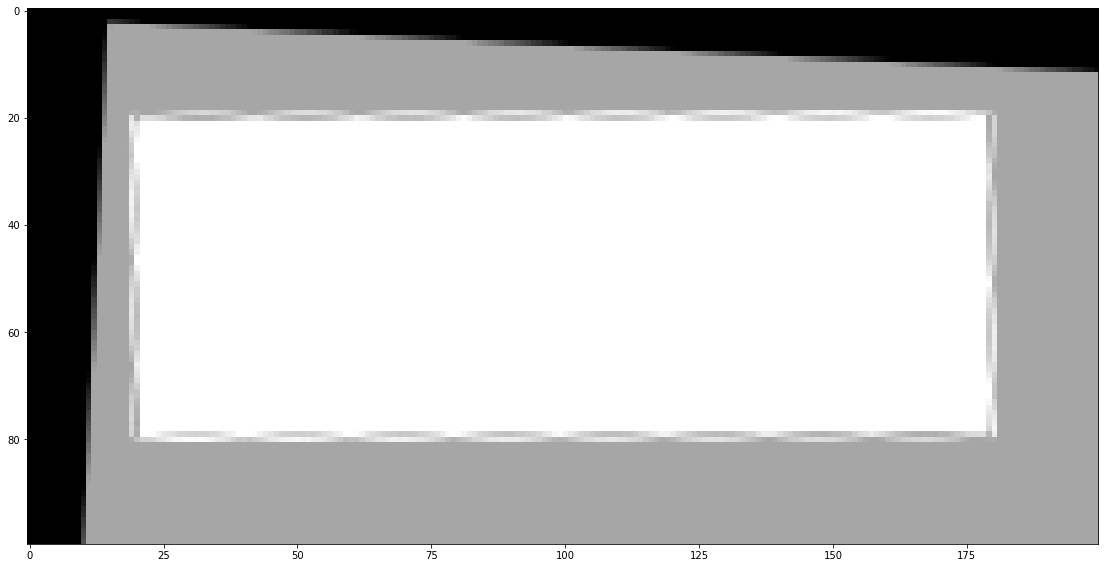

In [30]:
ply.Image(img1 + img2_shifted).show();